<a href="https://colab.research.google.com/github/AmindaUdayanga/Feature-Engineered-Rice-yield-Prediction-based-on-Weather-Data/blob/master/Initial_Kurunegala_Yala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from array import *
import math

##All datasets

In [3]:
df4 = pd.read_csv('/content/drive/MyDrive/ML_research/Initial_dataset/Kurunegala_yala_init.csv')
dataset4="Kurunegala yala kannaya"

In [4]:
df = df4
df

dataset=dataset4
print(df)


    year       radn       maxt       mint      rain    yield
0   1982  18.221780  30.726829  24.621951  5.200000  3453.00
1   1983  19.585360  31.815447  25.179675  3.506504  3300.00
2   1984  18.974714  30.875610  24.839024  2.316260  2985.00
3   1985  17.783557  30.269919  24.554472  5.389431  2989.00
4   1986  19.370095  31.045528  24.625203  1.873984  2811.00
5   1987  19.462160  31.463415  24.910569  4.150407  3330.00
6   1988  17.697284  30.808943  25.143902  5.178862  3009.00
7   1989  17.230658  30.376946  24.684505  4.853754  3259.00
8   1990  18.552164  30.427642  25.066667  3.328455  2667.00
9   1991  19.202394  31.069106  24.933333  4.494309  2815.00
10  1992  18.722525  30.341463  24.421951  4.029268  3291.00
11  1993  19.480272  30.515447  24.154472  4.112195  2740.00
12  1994  19.527636  17.197561  24.655796  2.547824  2780.00
13  1995  19.610884  30.553659  24.552033  4.414634  3007.00
14  1996  19.862429  30.716040  24.429268  2.095935  2309.00
15  1997  21.108312  31.

##pre processing

In [5]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['radn'] == 0])
df = df.drop(df.index[df['maxt'] == 0])
df = df.drop(df.index[df['mint'] == 0])
df = df.drop(df.index[df['rain'] == 0])
df = df.drop(df.index[df['yield'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year       radn       maxt       mint      rain    yield
0   1982  18.221780  30.726829  24.621951  5.200000  3453.00
1   1983  19.585360  31.815447  25.179675  3.506504  3300.00
2   1984  18.974714  30.875610  24.839024  2.316260  2985.00
3   1985  17.783557  30.269919  24.554472  5.389431  2989.00
4   1986  19.370095  31.045528  24.625203  1.873984  2811.00
5   1987  19.462160  31.463415  24.910569  4.150407  3330.00
6   1988  17.697284  30.808943  25.143902  5.178862  3009.00
7   1989  17.230658  30.376946  24.684505  4.853754  3259.00
8   1990  18.552164  30.427642  25.066667  3.328455  2667.00
9   1991  19.202394  31.069106  24.933333  4.494309  2815.00
10  1992  18.722525  30.341463  24.421951  4.029268  3291.00
11  1993  19.480272  30.515447  24.154472  4.112195  2740.00
12  1994  19.527636  17.197561  24.655796  2.547824  2780.00
13  1995  19.610884  30.553659  24.552033  4.414634  3007.00
14  1996  19.862429  30.716040  24.429268  2.095935  2309.00
15  1997  21.108312  31.

<Axes: >

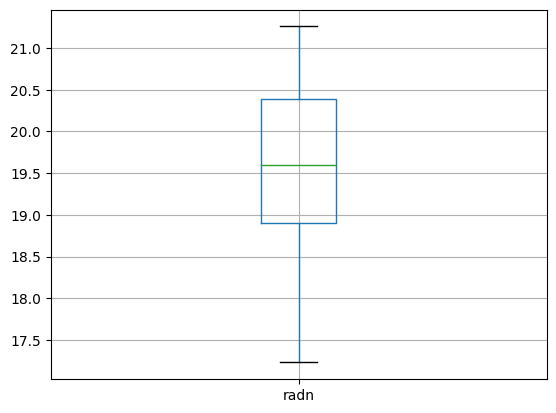

In [6]:
df.boxplot(column=['radn'])

<Axes: >

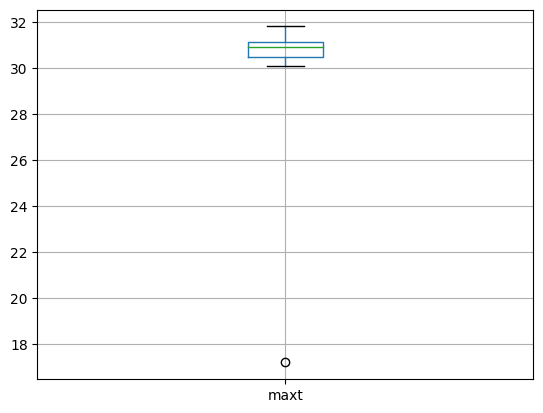

In [7]:
df.boxplot(column=['maxt'])


<Axes: >

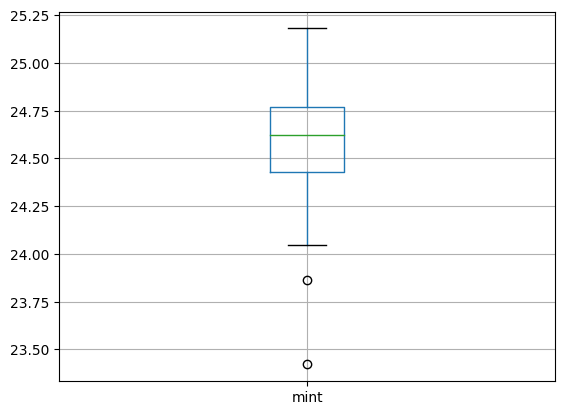

In [8]:
df.boxplot(column=['mint'])


<Axes: >

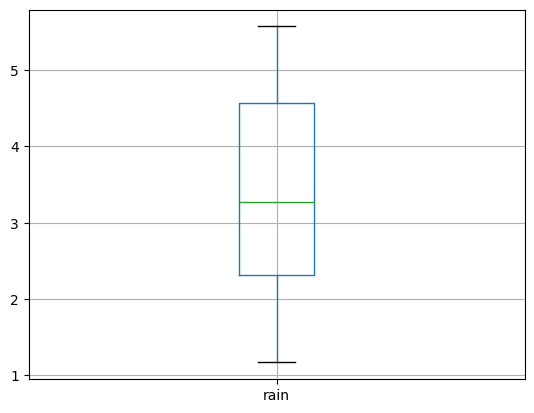

In [9]:
df.boxplot(column=['rain'])


In [10]:
df['radn'] = np.where(df['radn'] < (df['radn'].quantile(0.10)), (df['radn'].quantile(0.10)),df['radn'])
df['radn'] = np.where(df['radn'] >(df['radn'].quantile(0.90)), (df['radn'].quantile(0.90)),df['radn'])

df['maxt'] = np.where(df['maxt'] < (df['maxt'].quantile(0.10)), (df['maxt'].quantile(0.10)),df['maxt'])
df['maxt'] = np.where(df['maxt'] >(df['maxt'].quantile(0.90)), (df['maxt'].quantile(0.90)),df['maxt'])

df['mint'] = np.where(df['mint'] < (df['mint'].quantile(0.10)), (df['mint'].quantile(0.10)),df['mint'])
df['mint'] = np.where(df['mint'] >(df['mint'].quantile(0.90)), (df['mint'].quantile(0.90)),df['mint'])

df['rain'] = np.where(df['rain'] < (df['rain'].quantile(0.10)), (df['rain'].quantile(0.10)),df['rain'])
df['rain'] = np.where(df['rain'] >(df['rain'].quantile(0.90)), (df['rain'].quantile(0.90)),df['rain'])

In [11]:
####################3
def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }
test_acc = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0]
        }
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])

test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)


df_train = df[:-test_size]
df_test = df[-test_size:]


In [12]:
print(df_train)

    year       radn       maxt       mint      rain   yield
0   1982  18.254818  30.726829  24.621951  5.200000  3453.0
1   1983  19.585360  31.258724  24.931057  3.506504  3300.0
2   1984  18.974714  30.875610  24.839024  2.316260  2985.0
3   1985  18.254818  30.344715  24.554472  5.341220  2989.0
4   1986  19.370095  31.045528  24.625203  1.873984  2811.0
5   1987  19.462160  31.258724  24.910569  4.150407  3330.0
6   1988  18.254818  30.808943  24.931057  5.178862  3009.0
7   1989  18.254818  30.376946  24.684505  4.853754  3259.0
8   1990  18.552164  30.427642  24.931057  3.328455  2667.0
9   1991  19.202394  31.069106  24.931057  4.494309  2815.0
10  1992  18.722525  30.344715  24.421951  4.029268  3291.0
11  1993  19.480272  30.515447  24.154472  4.112195  2740.0
12  1994  19.527636  30.344715  24.655796  2.547824  2780.0
13  1995  19.610884  30.553659  24.552033  4.414634  3007.0
14  1996  19.862429  30.716040  24.429268  2.095935  2309.0
15  1997  20.869894  31.175610  24.57317

Feature: 1, Score: 0.16891
Feature: 2, Score: 0.21854
Feature: 3, Score: 0.42875
Feature: 4, Score: 0.18380


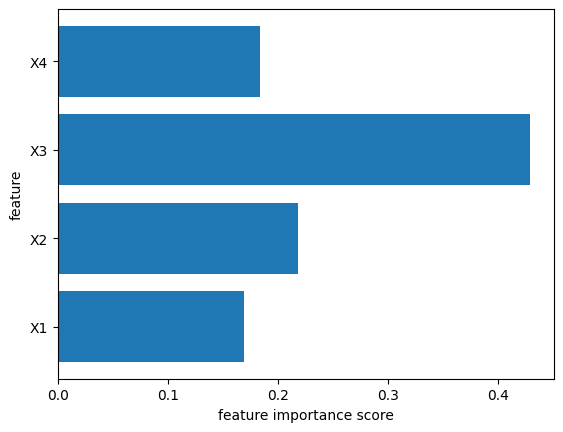

[[0, 0.16891169598656855], [1, 0.21853915220220496], [2, 0.4287496497090798], [3, 0.1837995021021467], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [13]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','yield'], axis=1)
y=df_train['yield']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.barh([f'X{x}' for x in range(1,len(importance)+1)], importance)
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.show()

print(arr)


[[2, 0.4287496497090798], [1, 0.21853915220220496], [3, 0.1837995021021467], [0, 0.16891169598656855], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


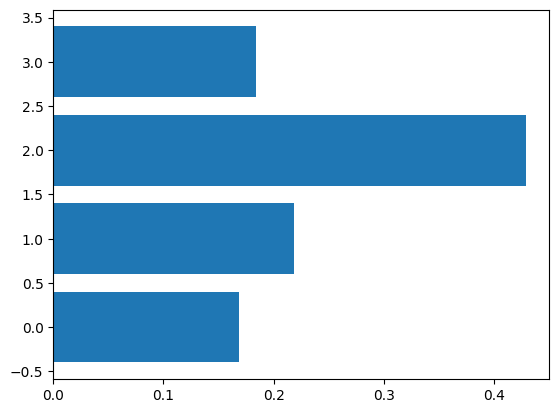

In [14]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


Feature: 1, Score: 0.16891
Feature: 4, Score: 0.18380
Feature: 2, Score: 0.21854
Feature: 3, Score: 0.42875


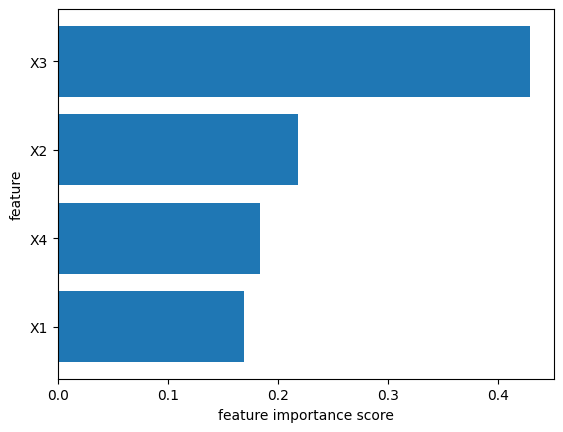

In [15]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','yield'], axis=1)
y=df_train['yield']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an list 'list_' with the feature index
list_ = [[0 for x in range(2)] for y in range(11)]
dic = {}
indexes=[]
values=[]
for i,v in enumerate(importance):
	dic[i+1] = v

# plot feature importance
sorted_list = sorted(dic.items(), key=lambda x:x[1],reverse=False)

sorted_dic = dict()
for item in sorted_list:
	sorted_dic[item[0]]=item[1]
	indexes.append(item[0])
	values.append(item[1])
	print('Feature: %0d, Score: %.5f' % (item[0],item[1]))
plt.barh([f'X{x}' for x in indexes], [val for val in  values])
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.savefig("KY_features.jpg",dpi=1200)
plt.show()


In [16]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,5):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[2, 0.4287496497090798]]
['mint']
[[2, 0.4287496497090798], [1, 0.21853915220220496]]
['mint', 'maxt']
[[2, 0.4287496497090798], [1, 0.21853915220220496], [3, 0.1837995021021467]]
['mint', 'maxt', 'rain']
[[2, 0.4287496497090798], [1, 0.21853915220220496], [3, 0.1837995021021467], [0, 0.16891169598656855]]
['mint', 'maxt', 'rain', 'radn']


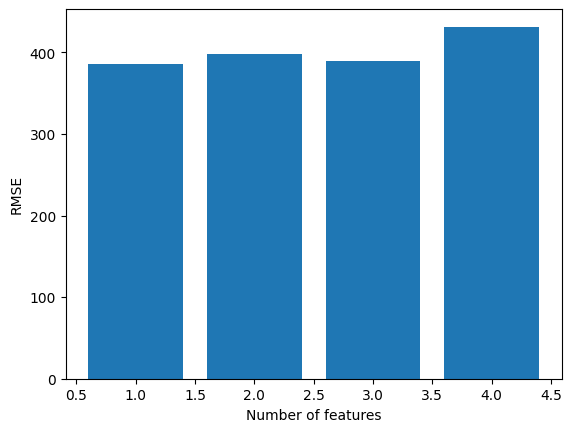

['mint']
385.523


In [17]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,5):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float64)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float64))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float64))
    selected_features_final = selected_features_list
plt.bar(np.arange(1,5), acc_array)
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]
[482.101, 194.553, 197.01, 384.268, 394.253]
330.437


<BarContainer object of 5 artists>

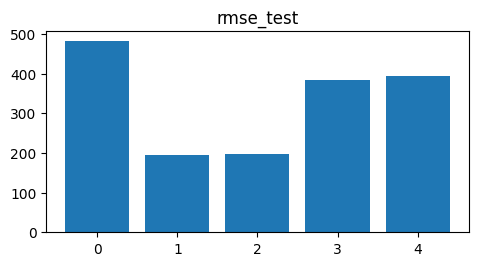

In [18]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float64))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

[0, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22] [1, 2, 5, 12, 13]

RMSE test:  606.336

RRMSE test:  17.15 %


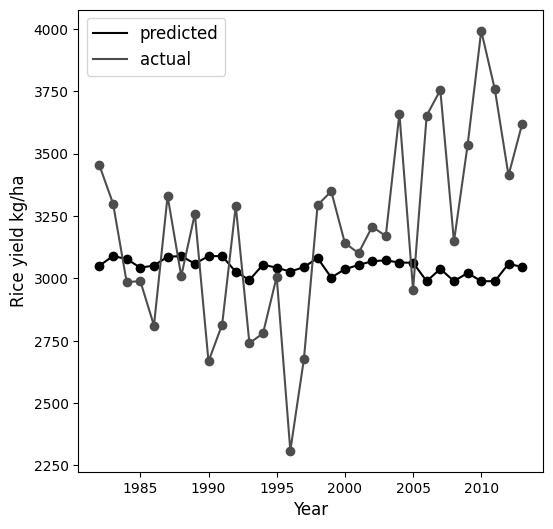

In [19]:

tr = [ 0 , 3 , 4 , 6 , 7 , 8 , 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22]
tt = [1 , 2 , 5, 12, 13]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['yield']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3')
plt.plot(df['year'],y__,color='0.3',label='actual')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KY_LR_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][0]='Linear Regression'
test_acc['RMSE test'][0]=rmse_test
test_acc['RRMSE test'][0]=rrmse_test
test_acc['MAE test'][0]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][0]=r2_score(y_,y_pred_)
test_acc['Bias test'][0]=bias_value(y_,y_pred_)



##SVR

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]


<BarContainer object of 5 artists>

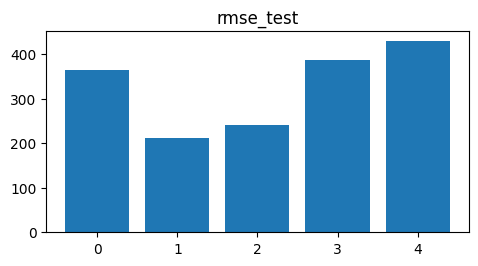

In [20]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22] [1, 2, 5, 12, 13]

RMSE test:  514.514

RRMSE test:  14.55 %


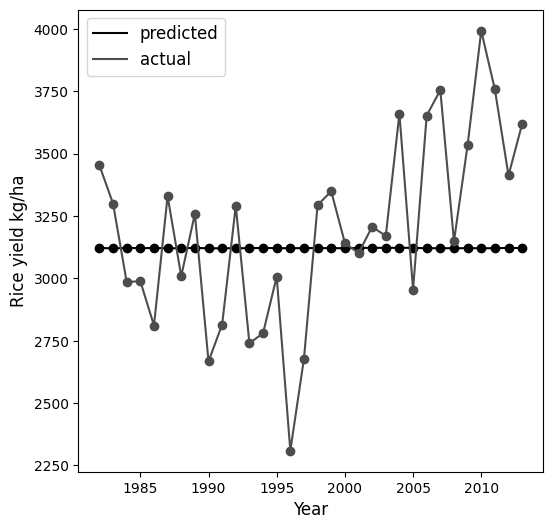

In [21]:
tr = [ 0 , 3 , 4 , 6 , 7 , 8 , 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22]
tt = [1 , 2 , 5, 12, 13]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()
test_acc['Method'][1]='SVR'
test_acc['RMSE test'][1]=rmse_test
test_acc['RRMSE test'][1]=rrmse_test
test_acc['MAE test'][1]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][1]=r2_score(y_,y_pred_)
test_acc['Bias test'][1]=bias_value(y_,y_pred_)
x__=df[selected_features_final]
y__=df['yield']
y__pred__=model.predict(scaler.transform(x__))
plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3')
plt.plot(df['year'],y__,color='0.3',label='actual')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KY_SVR_full.jpg",dpi=1200)
plt.show()

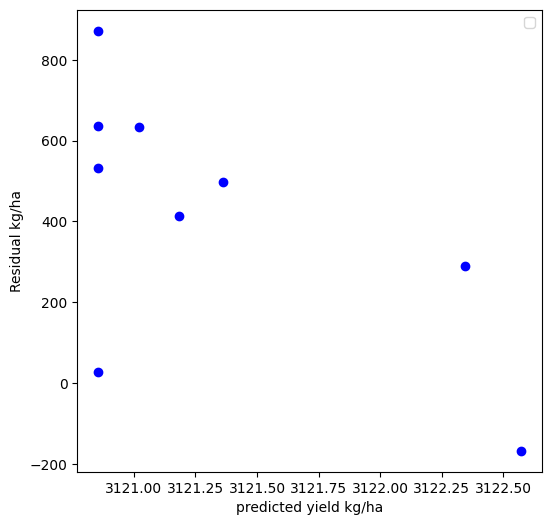

In [22]:
x_val = df_test[selected_features_final]
y_val = df_test['yield']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KY_SVR_res.jpg",dpi=1200)

plt.show()

##MLP

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


<BarContainer object of 5 artists>

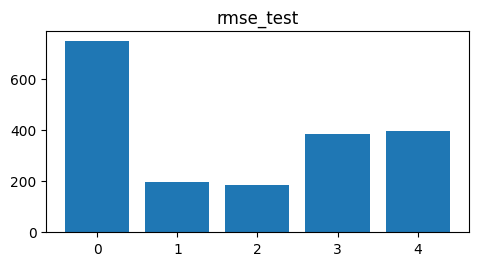

In [23]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    scaler = MinMaxScaler()
    print(tr,tt)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  597.748

RRMSE test:  16.90 %


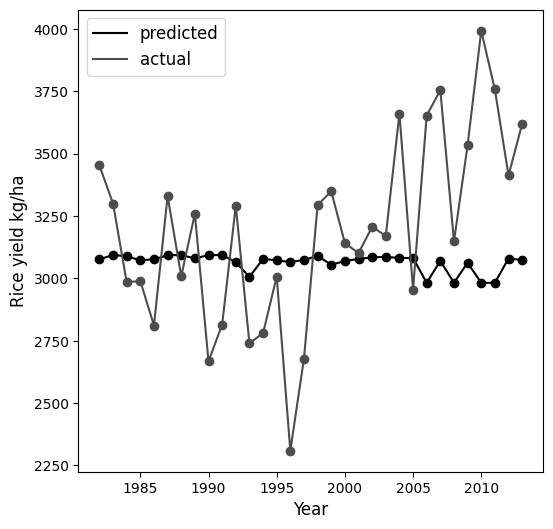

In [24]:
tr = [0 , 1 , 2 , 5 , 6 , 7 , 8 , 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [ 3 , 4, 11, 18, 20]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['yield']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3')
plt.plot(df['year'],y__,color='0.3',label='actual')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KY_MLP_full.jpg",dpi=1200)
plt.show()
test_acc['Method'][2]='MLP'
test_acc['RMSE test'][2]=rmse_test
test_acc['RRMSE test'][2]=rrmse_test
test_acc['MAE test'][2]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][2]=r2_score(y_,y_pred_)
test_acc['Bias test'][2]=bias_value(y_,y_pred_)

##KNN

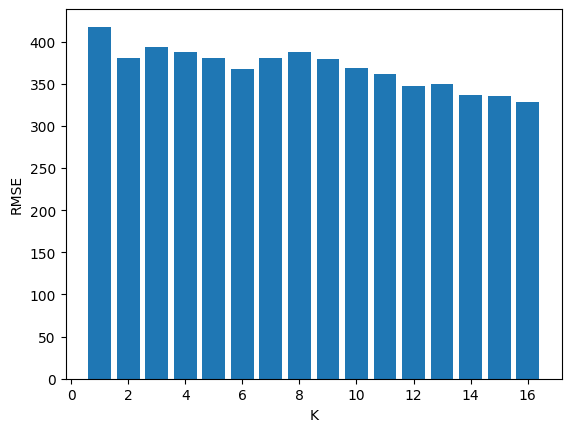

16


In [25]:
X=df_train[selected_features_final]
y=df_train['yield']

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K_min = 0
RMSE_min=math.inf
RMSE_list=[0 for t in range(len(x_train))]

for K in range(1,len(x_train)+1):
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    rmse_test = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    RMSE_list[K-1]=rmse_test
    if RMSE_min > rmse_test:
      RMSE_min = rmse_test
      K_min = K
plt.bar(np.arange(1,len(x_train)+1), RMSE_list)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

print(K_min)

[ 0  8  9 15 17] [ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22]
[ 1  2  5 12 13] [ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22]
[ 3  4 11 18 20] [ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22]
[ 7 16 21 22] [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20]
[ 6 10 14 19] [ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22]


<BarContainer object of 5 artists>

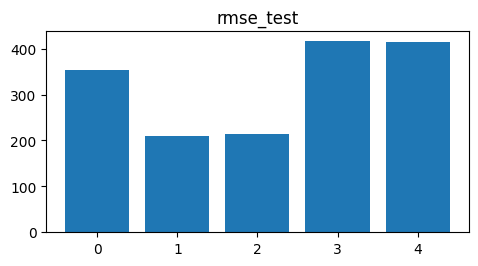

In [26]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tt,tr)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = K_min).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  657.094

RRMSE test:  18.58 %


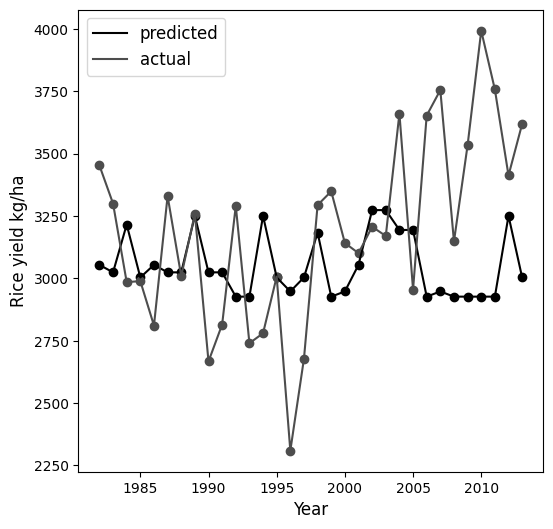

In [27]:
tr = [0 , 1 , 2 , 5 , 6 , 7 , 8 , 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [ 3 , 4, 11, 18, 20]

x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K=5
model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['yield']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3')
plt.plot(df['year'],y__,color='0.3',label='actual')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KY_KNN_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][3]='KNN'
test_acc['RMSE test'][3]=rmse_test
test_acc['RRMSE test'][3]=rrmse_test
test_acc['MAE test'][3]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][3]=r2_score(y_,y_pred_)
test_acc['Bias test'][3]=bias_value(y_,y_pred_)

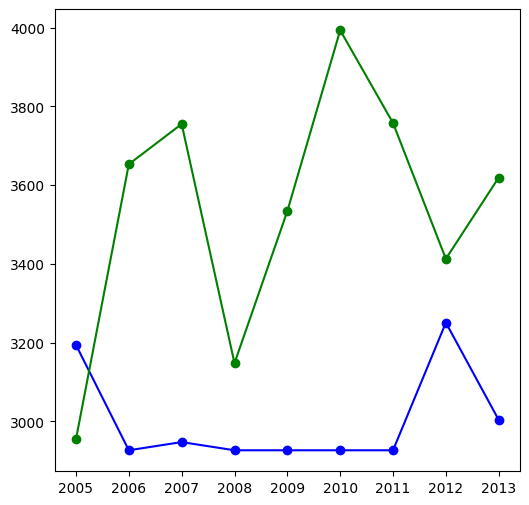

In [28]:

plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("KY_KNN_pred.jpg",dpi=1200)
plt.show()


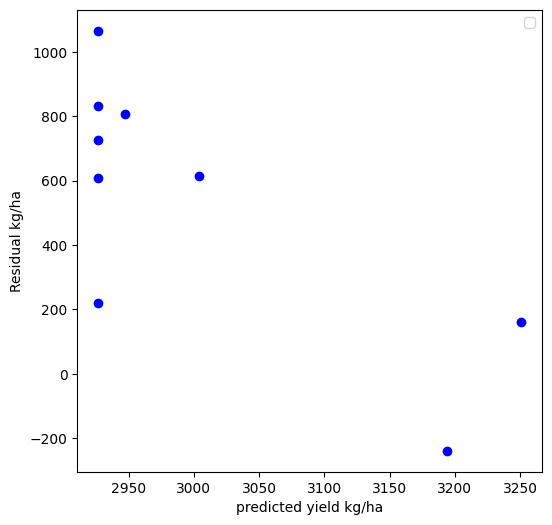

In [29]:
x_val = df_test[selected_features_final]
y_val = df_test['yield']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KY_KNN_res.jpg",dpi=1200)

plt.show()

##Random Forest

In [30]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float64))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['yield'], df_test['yield']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]
[463.925 351.848 331.636 359.803 420.403]
385.523
665.285


[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  573.1

RRMSE test:  16.21 %


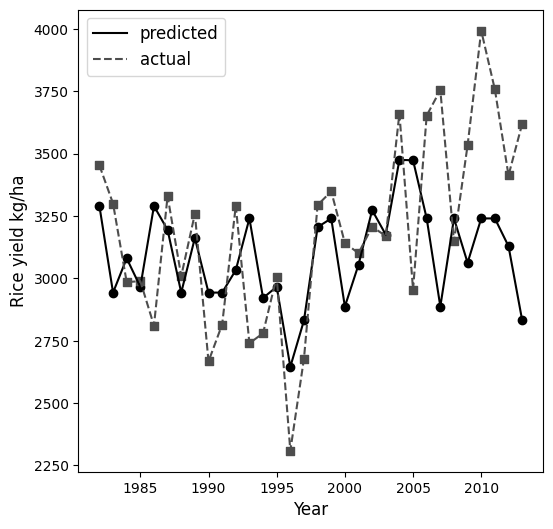

In [31]:
tr = [0 , 1 , 2 , 5 , 6 , 7 , 8 , 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [ 3 , 4, 11, 18, 20]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['yield']
y__pred__=model.predict(scaler.transform(x__))


plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3', marker='s')
plt.plot(df['year'],y__,color='0.3',label='actual',linestyle='dashed')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KY_RF_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][4]='RF'
test_acc['RMSE test'][4]=rmse_test
test_acc['RRMSE test'][4]=rrmse_test
test_acc['MAE test'][4]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][4]=r2_score(y_,y_pred_)
test_acc['Bias test'][4]=bias_value(y_,y_pred_)

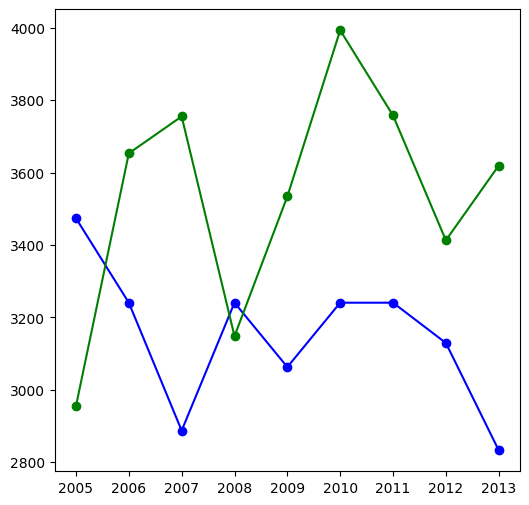

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("KY_RF_pred.jpg",dpi=1200)
plt.show()

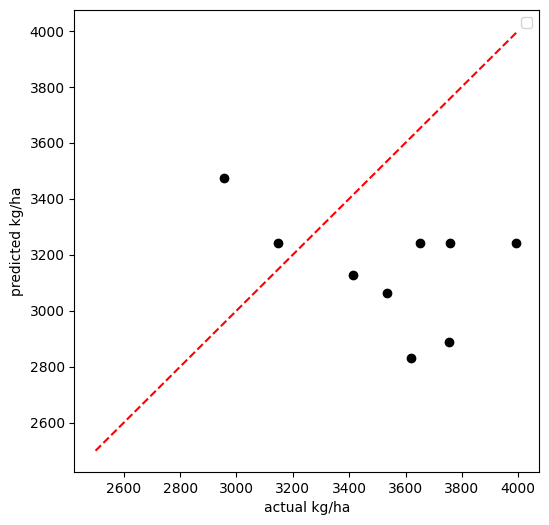

23    2955.00
24    3653.00
25    3755.00
26    3148.00
27    3534.00
28    3993.00
29    3757.57
30    3412.75
31    3619.16
Name: yield, dtype: float64


In [33]:
plt.figure(figsize=(6,6))
plt.scatter(y_, y_pred_,color='k')
plt.plot([2500, 4000], [2500, 4000], color='red', linestyle='--')
plt.xlabel("actual kg/ha")
plt.ylabel("predicted kg/ha")
plt.legend()
plt.savefig("KY_RF_pred.jpg",dpi=1200)

plt.show()
print(y_)

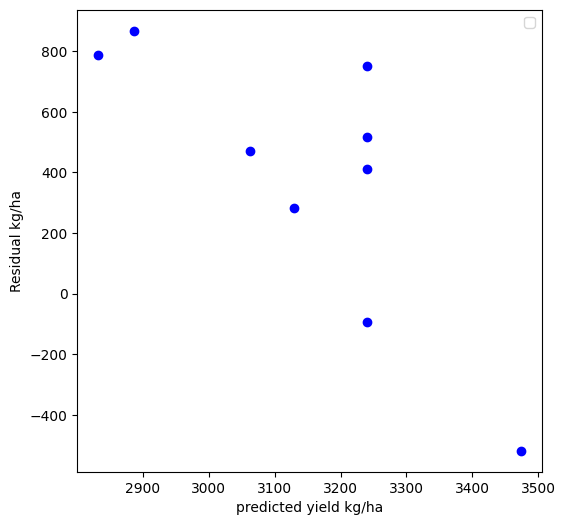

In [34]:
x_val = df_test[selected_features_final]
y_val = df_test['yield']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KY_RF_res.jpg",dpi=1200)

plt.show()

In [35]:
print(y_pred_)
print(y_)


[3473.652 3240.411 2887.077 3240.411 3062.649 3240.411 3240.411 3129.165
 2832.712]
23    2955.00
24    3653.00
25    3755.00
26    3148.00
27    3534.00
28    3993.00
29    3757.57
30    3412.75
31    3619.16
Name: yield, dtype: float64


# Results

In [36]:
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print("dataset: ", dataset)
print("test size : ",test_size,",", test_size*100/len(df.index),"%")
print(df_train)

dataset:  Kurunegala yala kannaya
test size :  9 , 28.125 %
              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression   330.4370    292.0516      10.800        9.550   
1                SVR   326.4872    304.2878      10.668        9.948   
2                MLP   382.8500    309.4856      12.550       10.116   
3                KNN   321.8994    302.7976      10.492        9.900   
4      Random Forest   385.5230    162.2886      12.634        5.308   

   MAE test  MAE train  R2_score test  R2_score train  Bias test    Bias train  
0  285.4028   237.2414      -0.882809        0.053783   4.565696  6.515386e-14  
1  273.5434   242.6462      -0.910164       -0.026444 -41.283938 -4.742286e+01  
2  326.4754   258.0990      -1.436611       -0.071461   7.207199 -4.169268e-01  
3  272.2616   248.1258      -0.939514       -0.016556   5.079375 -2.154715e+00  
4  331.5776   135.1998      -1.613432        0.703530  27.793352  7.911754e+00  


In [37]:
test_acc_df = pd.DataFrame(test_acc, columns = ['Method', 'RMSE test','RRMSE test','MAE test', 'R2_score test','Bias test'])
print(test_acc_df)

              Method  RMSE test RRMSE test  MAE test  R2_score test  \
0  Linear Regression    606.336      17.15   540.177      -2.987421   
1                SVR    514.514      14.55   452.302      -1.871179   
2                MLP    597.748      16.90   531.538      -2.875267   
3                KNN    657.094      18.58   586.164      -3.682969   
4                 RF    573.100      16.21   522.523      -2.562273   

    Bias test  
0  516.197317  
1  415.063861  
2  503.378601  
3  533.008889  
4  386.731222  


In [38]:
df_train.to_csv(r'KY_initial_train.csv', index = False, header=True)
test_acc_df.to_csv(r'KY_initial_test.csv',index=False, header=True)